In [9]:
from sympy import *
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint

#    Мои данные:

u(x,y) = (x^(2/5))*(y^(2/5))

p = 7

q = 5

I = 1684  

In [10]:
#u(x,y) = (x^(2/5))*(y^(2/5))
#p = 7
#q = 5
#I = 1684

In [11]:
def input_data():
    try:
        U = input("Функция полезности потребителя U(x,y) = ")
        p = int(input("Цена товара (p) = "))
        q = int(input("Цена товара (q) = "))
        I = int(input("Доход потребителя (I) = "))
    except ValueError:
        print("Ошибка ввода!")
        return None
    except KeyboardInterrupt:
        print("Прервано пользователем")
        return None
    return (U,p,q,I)

def check_data(varible):
    try:
        sympify(varible)
    except SympifyError:
        print("Неверный ввод")
        return False
    return True

In [12]:
my_functions = input_data()

if my_functions != None:
    result_of_check = check_data(my_functions[0])
    if result_of_check != False:
        print("Данные верны.")
    else:
        print("Ошибка! Повторите попытку ввода!")
else:
    print("Ошибка! Повторите попытку ввода!")

Функция полезности потребителя U(x,y) = (x^(2/5))*(y^(2/5))
Цена товара (p) = 7
Цена товара (q) = 5
Доход потребителя (I) = 1684
Данные верны.


In [13]:
U,p,q,I = my_functions
U_E = sympify(U)
U_E

x**(2/5)*y**(2/5)

In [14]:
bounds = Bounds([0.001, 0.001], [np.inf, np.inf])
linear_constraint = LinearConstraint([[p, q]], [0], [I])

result = optimize.minimize(lambda x: -lambdify(["x", "y"], U_E)(x[0], x[1]), x0=(1,1), 
                        method='trust-constr',
                       bounds=bounds, constraints=linear_constraint)
result

 barrier_parameter: 3.200000000000001e-05
 barrier_tolerance: 3.200000000000001e-05
          cg_niter: 14
      cg_stop_cond: 1
            constr: [array([1683.99872371]), array([120.28562281, 168.39987281])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.23102164268493652
               fun: -52.79857387921479
              grad: array([-0.17557734, -0.12541238])
               jac: [array([[7, 5]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([ 5.98473551e-10, -8.41078990e-10])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 36
              nhev: 0
               nit: 17
             niter: 17
              njev: 12
        optimality: 8.410789903584848e-10
            status: 1
           success: True
         tr_radius: 2596444.984167274
                 v: [array([0.02508251]), arr

In [15]:
x_max, y_max, extremum = result.x[0], result.x[1], -result.fun
print("Extremum: ",extremum)
print("Xy_max: ", x_max, y_max)

Extremum:  52.79857387921479
Xy_max:  120.28562280698715 168.39987281211674


In [16]:
def draw_matplot_lib():
    plt.figure()
    ax = plt.figure().add_subplot(projection='3d')
    x = np.linspace(0, x_max * 10)
    y = np.linspace(0, y_max * 10)
    X, Y = np.meshgrid(x, y)
    Z = lambdify(['x', 'y'], U_E)(X, Y)
    ax.scatter(x_max, y_max, extremum, color='red', s=20, marker='o', alpha = 1)
    
    ax.text(x_max + 2, y_max + 2, extremum + 2, f'M*{int(x_max), int(y_max)}', color='red')
    
    ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, alpha = 0.5, cmap = 'viridis')
    plt.title("График функции полезности")
    plt.xlabel("Цена единицы товара x1")
    plt.ylabel("Цена единицы товара x2")
    plt.show()

<Figure size 432x288 with 0 Axes>

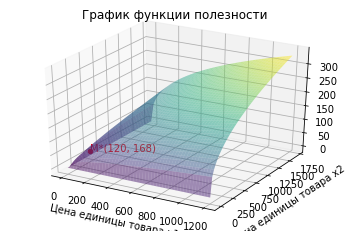

In [17]:
draw_matplot_lib()

In [18]:
def draw_contour():
    x, y = np.mgrid[0:x_max * 5,0:y_max * 5]
    z = lambdify(["x", "y"], U_E)(x, y)
    fig, ax = plt.subplots()
    ax.contour(x, y, z, levels=10)
    x1 = np.linspace(0, (I/p))
    y_treug = (I - p * x1) / q
    fig2 = ax.fill_between(x1, 0, y_treug)
    fig2.set_facecolor('orange')
    cr = ax.contour(x, y, z, levels=[extremum], colors="red")
    fig.set_figwidth(6)
    fig.set_figheight(6)
    plt.title("Функция полезности")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x_max, y_max, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
    plt.text(x_max + 100,y_max + 40,f'M*{int(x_max), int(y_max)}',horizontalalignment='right', color = "red") 
    plt.show()

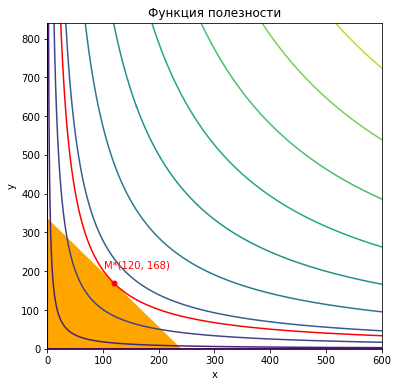

In [19]:
draw_contour()

In [20]:
print("Оптимальный план: ", (int(x_max), int(y_max)))
print("Максимальная прибыль: ", extremum)

Оптимальный план:  (120, 168)
Максимальная прибыль:  52.79857387921479
